In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import math
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [9,9]

In [2]:
#number of dimensions for 3-D real values vectors
C=4
features = 3
#number of samples to be generated for the vector
samples = 10000

In [3]:
#initialize the means for the four distributions
#means at corner of a square
mean = np.zeros((features,C))
mean[:,0] = [-1,1,0] #mean vector of class 1
mean[:,1] = [1,1,0] #mean vector of class 2
mean[:,2] = [1,-1,0] #mean vector of class 3
mean[:,3] = [-1,-1,0] #mean vector of class 4

In [4]:
#initialize the covariance matrices
#spherically symmetric
#adjust the eigenvalues of the covariance matrices such that they are comparable to approx 10-20% of the separation between the mean vectors for two classes
N = 1/2
I = np.eye(features)
cov = np.zeros((features, features,C))
cov[:,:,0] = N*I #covariance matrix of class 1
cov[:,:,1] = N*I#covariance matrix of class 2
cov[:,:,2] = N*I #covariance matrix of class 3
cov[:,:,3] = N*I #covariance matrix of class 4

In [5]:
#initialize priors for different gaussians of distribution of class 1,2,3,4 respectively
prior = [0.2, 0.25, 0.25, 0.3]

In [6]:
#cost/loss matrix (lambda matrix)
loss = np.array([[0,1,2,3], [10,0,5,10],[20,10,0,1],[30,20,1,0]])

In [7]:
#labels matrix
'''label matrix where first row corresponds to true labels and second row
the labels corresponding to labels of decisions made'''
label = np.zeros((2, samples)) #2x10000 zero matrix for label values
a = (np.random.uniform(0,1,samples)) #draws 10,000 samples from a uniform distribution   
for i in range(0,samples):
    if (a[i] <= prior[0]):
        label[0,i] = 0
    elif ((a[i] > prior[0]) and (a[i] <= prior[0]+prior[1])):
        label[0,i] = 1
    elif ((a[i] > prior[0]+prior[1]) and (a[i] <= prior[0]+prior[1]+prior[2])):
        label[0,i] = 2
    else:
        label[0,i] = 3   

In [8]:
#initialize class matrices
class_count = np.zeros((1,C))
for i in range(4):
    class_count[:,i]= float(list(label[0,:]).count(i)) #number of samples for class 1

In [9]:
#generate the data
X = np.zeros((features,samples)) #3x10000 zero matrix for X values
for i in range(samples): #compare index number in sample number
    if (label[0,i] == 0): #if true label is class 1
        X[:,i] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1) #normal distr from class 1
    elif (label[0,i] == 1):
        X[:,i] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)
    elif (label[0,i] == 2):
        X[:,i] = np.random.multivariate_normal(mean[:,2],cov[:,:,2],1)
    else:
        X[:,i] = np.random.multivariate_normal(mean[:,3],cov[:,:,3],1) 

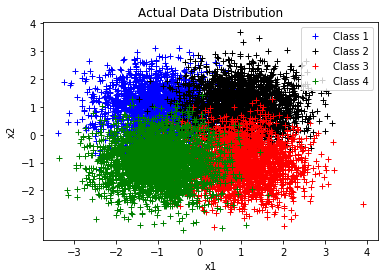

In [10]:
x1 = [i for i in range(label.shape[1]) if (label[0,i] ==0)]
x2 = [i for i in range(label.shape[1]) if (label[0,i] ==1)]
x3 = [i for i in range(label.shape[1]) if (label[0,i] ==2)]
x4 = [i for i in range(label.shape[1]) if (label[0,i] ==3)]

plt.plot(X[0,x1],X[1,x1],'+',color = 'blue')
plt.plot(X[0,x2],X[1,x2],'+',color = 'black')
plt.plot(X[0,x3],X[1,x3],'+',color = 'red')
plt.plot(X[0,x4],X[1,x4],'+',color = 'green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Actual Data Distribution')
plt.legend(['Class 1', 'Class 2','Class 3','Class 4'])
plt.show()

In [11]:
#class posterior
#evaluate probability of x given a label p(L=l|x) = p(x|L=l)*prior
pxgivenl = np.zeros((4,samples))
for i in range(4):
    pxgivenl[i,:] = multivariate_normal.pdf(X.T,mean[:,i],cov[:,:,i], samples)
    #px = prior[i]*pxgivenl
    #prob = prob+np.array(prior[i]*pxgivenl)
    #class_post[i,:] = prob
px = np.dot(prior,pxgivenl)
class_post = np.divide(pxgivenl*np.matlib.repmat(np.array([0.2, 0.25, 0.25, 0.3]),1,2500), np.matlib.repmat(px,C,1))

In [12]:
risk = np.dot(loss, class_post)
label[1,:] = np.argmin(risk, axis=0)

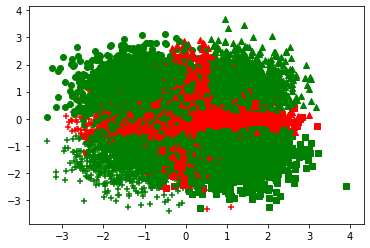

In [16]:
markers = ['o','^','s','+']
colors = ['r','g']
for i in range(samples):
    plt.scatter(X[:,i][0], X[:,i][1], marker=markers[int(label[0,i])], color=colors[int(label[0,i])==int(label[1,i])])

In [14]:
cm = confusion_matrix(label[0,:],label[1,:])
print(cm)

[[1926   17    5   19]
 [ 964 1449   58    1]
 [ 436   52 1897  110]
 [ 835    1  255 1975]]


In [15]:
cm_prob = np.divide(cm,class_count)
cm_prob

array([[9.79156075e-01, 6.87702265e-03, 2.00400802e-03, 6.19699935e-03],
       [4.90086426e-01, 5.86165049e-01, 2.32464930e-02, 3.26157860e-04],
       [2.21657346e-01, 2.10355987e-02, 7.60320641e-01, 3.58773646e-02],
       [4.24504321e-01, 4.04530744e-04, 1.02204409e-01, 6.44161774e-01]])